Breast Cancer Detector 
8/11/2019
Andrew Kaplan & Daesesob Lim

Dataset: https://www.kaggle.com/merishnasuwal/breast-cancer-prediction-dataset

Goal: train neural network model to detect breast cancer using 5 parameters 


In [1]:
import pandas as pd 
data = pd.read_csv("Breast_cancer_data.csv")
data.head()


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [2]:
import csv
import numpy as np
import math 

In [3]:
# Getting Data

with open("Breast_cancer_data.csv", "r") as f:
    bc_data = list(csv.reader(f, delimiter=';'))
  
for i in range(len(bc_data)):
    bc_data[i] = bc_data[i][0].split(',')
    
bc_data.pop(0)
bc_data = np.array(data, np.float64)

train_data = []
train_target = []
val_data = []
val_target =[]
test_data = []
test_target = []

n = math.floor(len(data) *.5 + 1)
m = math.floor(len(data) *.25)

np.random.shuffle(bc_data)


train_data = bc_data[:n,:5]
train_target = bc_data[:n,5]
val_data = bc_data[n:n+m,:5]
val_target = bc_data[n:n+m,5]
test_data = bc_data[n+m:,:5]
test_target = bc_data[n+m:,5]
        



In [4]:
print("Training data length:", len(train_data))
print("Validation data length:", len(val_data))
print("Testing data length:", len(val_data))
print("Total data length:", len(bc_data))

Training data length: 285
Validation data length: 142
Testing data length: 142
Total data length: 569


In [5]:
data.head(10)
print(train_data[0])

[1.356e+01 1.390e+01 8.859e+01 5.613e+02 1.051e-01]


In [6]:
# Normalziation

radius = []
texture = []
perimeter = []
area = []
smoothness = []

for i in range(len(train_data)):
    radius.append(train_data[i][0])
    texture.append(train_data[i][1])
    perimeter.append(train_data[i][2])
    area.append(train_data[i][3])
    smoothness.append(train_data[i][4])
    
rad_mean = np.mean(radius)
rad_std = np.std(radius)
texture_mean = np.mean(texture)
texture_std = np.std(texture)
perim_mean = np.mean(perimeter)
perim_std = np.std(perimeter)
area_mean = np.mean(area)
area_std = np.std(area)
smooth_mean = np.mean(smoothness)
smooth_std = np.std(smoothness)

#Training Set

train_data[:,0] -= rad_mean #for all rows of column 0, subtract the mean from the original datapoint
train_data[:,0] /= rad_std #for all rows of column 0, divide [original datapoint - mean] by standard dev
train_data[:,1] -= texture_mean
train_data[:,1] /= texture_std
train_data[:,2] -= perim_mean
train_data[:,2] /= perim_std
train_data[:,3] -= area_mean
train_data[:,3] /= area_std
train_data[:,4] -= smooth_mean
train_data[:,4] /= smooth_std

#Validation Set

val_data[:,0] -= rad_mean 
val_data[:,0] /= rad_std 
val_data[:,1] -= texture_mean
val_data[:,1] /= texture_std
val_data[:,2] -= perim_mean
val_data[:,2] /= perim_std
val_data[:,3] -= area_mean
val_data[:,3] /= area_std
val_data[:,4] -= smooth_mean
val_data[:,4] /= smooth_std

#Testing Set

test_data[:,0] -= rad_mean 
test_data[:,0] /= rad_std 
test_data[:,1] -= texture_mean
test_data[:,1] /= texture_std
test_data[:,2] -= perim_mean
test_data[:,2] /= perim_std
test_data[:,3] -= area_mean
test_data[:,3] /= area_std
test_data[:,4] -= smooth_mean
test_data[:,4] /= smooth_std

In [7]:
print(test_data[0])

[-0.07407139 -0.55839394 -0.04193439 -0.21294083  0.37490379]


In [8]:
import keras
from keras import models
from keras import layers
from keras import optimizers

keras.backend.clear_session() #failsafe

model = models.Sequential() #basic deep learning model, linear stack of layers
model.add(layers.Dense(64, activation = 'relu', input_shape=(5,))) 
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['accuracy'])

model_hist = model.fit(train_data, train_target, epochs = 30, batch_size = 128, validation_data = (val_data, val_target))

Using TensorFlow backend.
C:\Users\ackap\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ackap\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ackap\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ackap\Anaconda3\envs\te

Train on 285 samples, validate on 142 samples
Epoch 1/30
285/285 [==============================] - 0s 2ms/step - loss: 0.5377 - acc: 0.8912 - val_loss: 0.5033 - val_acc: 0.8944
Epoch 2/30
285/285 [==============================] - 0s 45us/step - loss: 0.4930 - acc: 0.8947 - val_loss: 0.4597 - val_acc: 0.9225
Epoch 3/30
285/285 [==============================] - 0s 49us/step - loss: 0.4502 - acc: 0.8947 - val_loss: 0.4199 - val_acc: 0.9155
Epoch 4/30
285/285 [==============================] - 0s 45us/step - loss: 0.4127 - acc: 0.9053 - val_loss: 0.3847 - val_acc: 0.9155
Epoch 5/30
285/285 [==============================] - 0s 52us/step - loss: 0.3791 - acc: 0.9053 - val_loss: 0.3534 - val_acc: 0.9155
Epoch 6/30
285/285 [==============================] - 0s 38us/step - loss: 0.3495 - acc: 0.9088 - val_loss: 0.3254 - val_acc: 0.9155
Epoch 7/30
285/285 [==============================] - 0s 56us/step - loss: 0.3231 - acc: 0.9053 - val_loss: 0.3007 - val_acc: 0.9225
Epoch 8/30
285/285 [====

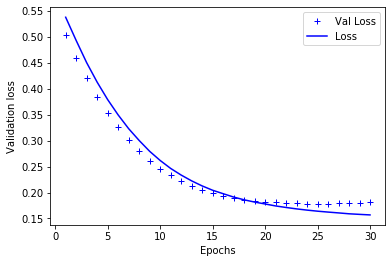

In [10]:
import matplotlib.pyplot as plt

model_acc = model_hist.history['acc']
model_loss = model_hist.history['loss']
model_val_acc = model_hist.history['val_acc']
model_val_loss = model_hist.history['val_loss']

epochs = range(1, len(model_acc) + 1)
# b+ is for "blue cross"
plt.plot(epochs, model_val_loss, 'b+', label='Val Loss')
plt.plot(epochs, model_loss, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()



In [11]:
test_loss, test_acc = model.evaluate(test_data, test_target)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

numBC = 0
for i in range(len(test_target)):
    if test_target[i] == 1:
        numBC += 1
BCPer = numBC/len(test_target)
print("Number of patients who have breast cancer in test data percentage: ", BCPer*100)

142/142 [==============================] - 0s 88us/step
Test Loss:  0.12042561897509535
Test Accuracy:  0.9577464788732394
Number of patients who have breast cancer in test data percentage:  59.154929577464785
